In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#df_pm= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/HR_Analytics_DBScan (1).csv", skipinitialspace=True, sep=',')
df_pm= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HR_Analytics/csv/HR_Analytics_DBScan.csv", skipinitialspace=True, sep=',')

In [ ]:
#df_und= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/HR_Analytics_Data_Understanding.csv", skipinitialspace=True, sep=',')
df_und= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HR_Analytics/csv/HR_Analytics_Data_Understanding.csv", skipinitialspace=True, sep=',')

In [ ]:
df_pm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   city_development_index  19158 non-null  object
 1   gender                  19158 non-null  object
 2   relevent_experience     19158 non-null  object
 3   enrolled_university     19158 non-null  object
 4   education_level         19158 non-null  object
 5   major_discipline        19158 non-null  object
 6   experience              19158 non-null  object
 7   company_size            19158 non-null  object
 8   company_type            19158 non-null  object
 9   last_new_job            19158 non-null  object
 10  training_hours          19158 non-null  object
dtypes: object(11)
memory usage: 1.6+ MB


Aggiungo la colonna mancante target

In [ ]:
target = df_und["target"]
df_pm = df_pm.join(target)

In [ ]:
df_pm.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,High,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,"(0.665, 84.75]",1.0
1,Medium,Male,No relevent experience,no_enrollment,Graduate,STEM,"(10, 15]",50-99,Pvt Ltd,>4,"(0.665, 84.75]",0.0
2,Medium,Male,No relevent experience,Full time course,Graduate,STEM,"(0, 5]",50-99,Pvt Ltd,0,"(0.665, 84.75]",0.0
3,High,Male,No relevent experience,no_enrollment,Graduate,Business Degree,"(0, 5]",500-999,Pvt Ltd,0,"(0.665, 84.75]",1.0
4,Medium,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,"[2, 4]","(0.665, 84.75]",0.0


In [ ]:
#target_dict = {0: 'Stay',
 #            1: 'Leave'
  #           }

#df_pm['target'] = df_pm['target'].map(target_dict)

In [ ]:
columns=['city_development_index', 'experience','company_size', 'last_new_job','training_hours']

In [ ]:
label=['cdi', 'exp', 'com_size','lnewj',
       'thours']

In [ ]:
for col in range(len(label)):
  df_pm[columns[col]]=df_pm[columns[col]].astype(str)+ ' ' + label[col]
  

In [ ]:
df_pm.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,High cdi,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20 exp,50-99 com_size,Pvt Ltd,1 lnewj,"(0.665, 84.75] thours",1.0
1,Medium cdi,Male,No relevent experience,no_enrollment,Graduate,STEM,"(10, 15] exp",50-99 com_size,Pvt Ltd,>4 lnewj,"(0.665, 84.75] thours",0.0
2,Medium cdi,Male,No relevent experience,Full time course,Graduate,STEM,"(0, 5] exp",50-99 com_size,Pvt Ltd,0 lnewj,"(0.665, 84.75] thours",0.0
3,High cdi,Male,No relevent experience,no_enrollment,Graduate,Business Degree,"(0, 5] exp",500-999 com_size,Pvt Ltd,0 lnewj,"(0.665, 84.75] thours",1.0
4,Medium cdi,Male,Has relevent experience,no_enrollment,Masters,STEM,>20 exp,50-99 com_size,Funded Startup,"[2, 4] lnewj","(0.665, 84.75] thours",0.0


Text(0.5, 0, 'experience')

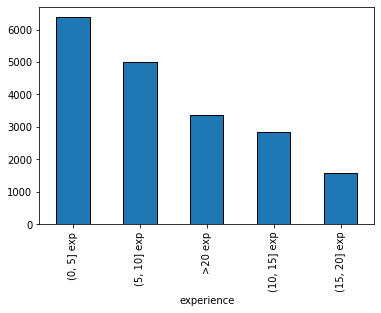

In [ ]:
df_pm['experience'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('experience')

Text(0.5, 0, 'city_development_index')

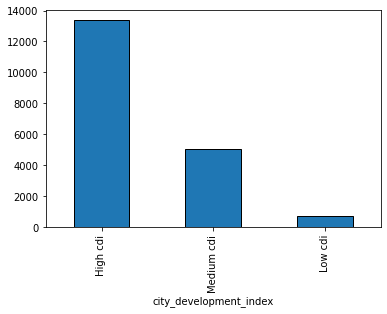

In [ ]:
df_pm['city_development_index'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('city_development_index')

Text(0.5, 0, 'major_discipline')

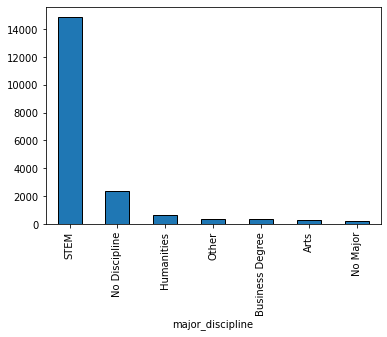

In [ ]:
df_pm['major_discipline'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('major_discipline')

Text(0.5, 0, 'gender')

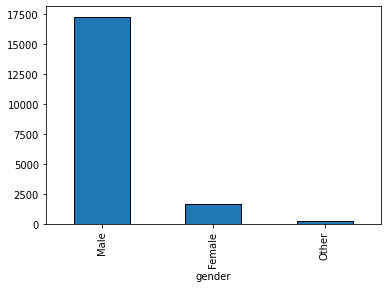

In [ ]:
df_pm['gender'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('gender')

In [ ]:
!pip install pyfim

     |████████████████████████████████| 358kB 6.3MB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp37-cp37m-linux_x86_64.whl size=537716 sha256=f0c879e36776233fa17278d65765833e61b54372b617dc3eee613716634ab0bb
  Stored in directory: /root/.cache/pip/wheels/19/ac/b4/9ae8ceb2208d78b21b1157f8561cc4469d236b7d785e7422f1
Successfully built pyfim


In [ ]:
from fim import apriori

In [ ]:
help (apriori)

NameError: ignored

In [ ]:
baskets=df_pm.values.tolist() #serve per trasformarlo in lista di liste da forma matriciale 

# Frequent patterns extraction with different values of support and different types (i.e. frequent, close, maximal)

Ho creato una funzione che permettesse di avere come output i principali itemset per ogni type e support value di nostro interesse

Lista di liste o Diz di diz (chive charlist e per ogni valore di cahrlist un altro dizionario in cui le chiavi sono i support value e i valori itemset e frequenza) 

In [ ]:
charList=['a','c','m']
support_values=[10,20,30,40]

def takeSecond(elem):
    return elem[1]


for char in charList:
  for value in support_values:
    itemsets=apriori(baskets, target=char, supp=value, zmin=2)
    itemsetSorted= sorted(itemsets,reverse=True,key=takeSecond)
    df_iset=pd.DataFrame(itemsetSorted, columns =['itemsets', 'frequenza'])
    print(char, value,df_iset.head())

a 10                         itemsets  frequenza
0                   (STEM, Male)      13475
1                (Pvt Ltd, Male)      13091
2                    (0.0, Male)      13029
3          (no_enrollment, Male)      12737
4  ((0.665, 84.75] thours, Male)      12691
a 20                         itemsets  frequenza
0                   (STEM, Male)      13475
1                (Pvt Ltd, Male)      13091
2                    (0.0, Male)      13029
3          (no_enrollment, Male)      12737
4  ((0.665, 84.75] thours, Male)      12691
a 30                         itemsets  frequenza
0                   (STEM, Male)      13475
1                (Pvt Ltd, Male)      13091
2                    (0.0, Male)      13029
3          (no_enrollment, Male)      12737
4  ((0.665, 84.75] thours, Male)      12691
a 40                         itemsets  frequenza
0                   (STEM, Male)      13475
1                (Pvt Ltd, Male)      13091
2                    (0.0, Male)      13029
3          (

In [ ]:
charList=['a','c','m']
support_values=range(5, 50+1, 5)
def takeSecond(elem):
    return elem[1]

dict_char = {'a': {}, 'c': {}, 'm': {}}

for key in dict_char:
  for sup in support_values:
    itemsets=apriori(baskets, target=key, supp=sup, zmin=2)
    dict_char[key][sup]=sorted(itemsets,reverse=True,key=takeSecond)

In [ ]:
dict_char['a'][10]

[(('STEM', 'Male'), 13475),
 (('Pvt Ltd', 'Male'), 13091),
 ((0.0, 'Male'), 13029),
 (('no_enrollment', 'Male'), 12737),
 (('(0.665, 84.75] thours', 'Male'), 12691),
 (('Has relevent experience', 'Male'), 12527),
 (('High cdi', 'Male'), 12048),
 (('Has relevent experience', 'STEM'), 11608),
 (('Has relevent experience', 'no_enrollment'), 11472),
 (('High cdi', 0.0), 11253),
 (('Pvt Ltd', 'STEM'), 11224),
 (('no_enrollment', 'STEM'), 11185),
 (('no_enrollment', 0.0), 11086),
 ((0.0, 'STEM'), 10990),
 (('(0.665, 84.75] thours', 'STEM'), 10935),
 ((0.0, 'Pvt Ltd'), 10868),
 (('Has relevent experience', 0.0), 10831),
 (('no_enrollment', 'Pvt Ltd'), 10818),
 (('Graduate', 'Male'), 10714),
 (('(0.665, 84.75] thours', 'Pvt Ltd'), 10616),
 (('Has relevent experience', 'Pvt Ltd'), 10608),
 (('Has relevent experience', 'STEM', 'Male'), 10588),
 (('Graduate', 'STEM'), 10517),
 (('(0.665, 84.75] thours', 0.0), 10504),
 (('High cdi', 'no_enrollment'), 10473),
 (('Has relevent experience', 'no_enrol

all  frequent item sets

Text(0.5, 0, 'major_discipline')

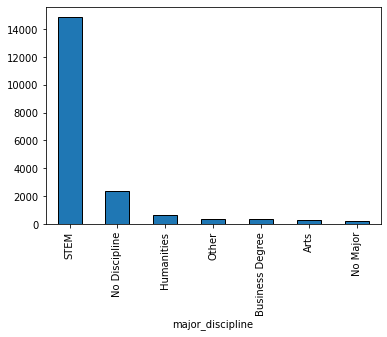

In [ ]:
df_pm['major_discipline'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('major_discipline')

Text(0.5, 0, 'gender')

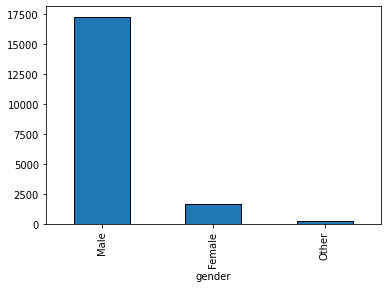

In [ ]:
df_pm['gender'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('gender')

Text(0.5, 0, 'company_type')

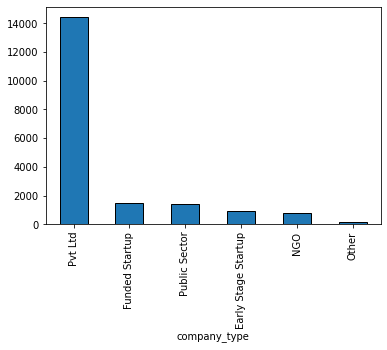

In [ ]:
df_pm['company_type'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('company_type')

#Abbiamo verficato la correttezza dei valori generati dal ciclo for, analizzando i target separatamente con supporto standard di 20

In [ ]:
itemsets_freq=apriori(baskets, target='a', supp=10, zmin=2) 
itemsetSorted= sorted(itemsets_freq,reverse=True,key=takeSecond)


In [ ]:
df_ifreq=pd.DataFrame(itemsetSorted, columns =['itemsets', 'freq'])

In [ ]:
df_ifreq.head(10) 

,itemsets,freq
0,"(STEM, Male)",13475
1,"(Pvt Ltd, Male)",13091
2,"(0.0, Male)",13029
3,"(no_enrollment, Male)",12737
4,"((0.665, 84.75] thours, Male)",12691
5,"(Has relevent experience, Male)",12527
6,"(High cdi, Male)",12048
7,"(Has relevent experience, STEM)",11608
8,"(Has relevent experience, no_enrollment)",11472
9,"(High cdi, 0.0)",11253


**Closed  frequent item sets** (A closed pattern is a frequent pattern. So it meets the minimum support criteria. In addition to that, all super-patterns of a closed pattern are less frequent than the closed pattern.)

link: https://stackoverflow.com/questions/32414317/maximal-vs-closed-patterns-in-association-rule-mining/50633139#:~:text=A%20maximal%20itemset%20is%20an,that%20has%20the%20same%20support.

In [ ]:
itemsets_clo=apriori(baskets, target='c', supp=20, zmin=2 )
itemsetSorted_c= sorted(itemsets_clo,reverse=True,key=takeSecond)


In [ ]:
df_iclo=pd.DataFrame(itemsetSorted_c, columns =['itemsets', 'freq'])
df_iclo.head()

,itemsets,freq
0,"(STEM, Male)",13475
1,"(Pvt Ltd, Male)",13091
2,"(0.0, Male)",13029
3,"(no_enrollment, Male)",12737
4,"((0.665, 84.75] thours, Male)",12691


**Maximal frequent item sets**(A max pattern is a frequent pattern. So it also meets the minimum support criteria like closed pattern In addition, but unlike closed pattern, all super-patterns of a max pattern are NOT frequent patterns.)

link: https://stackoverflow.com/questions/32414317/maximal-vs-closed-patterns-in-association-rule-mining/50633139#:~:text=A%20maximal%20itemset%20is%20an,that%20has%20the%20same%20support.



In [ ]:
itemsets_max=apriori(baskets, target='m', supp=10, zmin=2 )
itemsetSorted_m= sorted(itemsets_max,reverse=True,key=takeSecond)

In [ ]:
df_max=pd.DataFrame(itemsetSorted_m, columns =['itemsets', 'freq'])
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(df_max.head(10))

,itemsets,freq
0,"(Full time course, (0.665, 84.75] thours, Male)",2561
1,"(No relevent experience, (0.665, 84.75] thours, Pvt Ltd, Male)",2554
2,"(Full time course, Pvt Ltd, Male)",2473
3,"((0, 5] exp, High cdi, 0.0, Male)",2432
4,"((5, 10] exp, Has relevent experience, no_enrollment, STEM, Male)",2418
5,"(1 lnewj, Graduate, Has relevent experience, (0.665, 84.75] thours, STEM, Male)",2369
6,"(1.0, Has relevent experience, STEM, Male)",2357
7,"(No relevent experience, High cdi, 0.0, Male)",2352
8,"(No relevent experience, (0.665, 84.75] thours, 0.0, Male)",2345
9,"((5, 10] exp, Has relevent experience, Pvt Ltd, STEM, Male)",2342


# Discussion of the most interesting frequent patterns and analyze how changes the number of patterns w.r.t. the min_sup parameter

Come varia la lista di itemsets al variare del min supp
Inserire sull'asse delle x il supporto
---





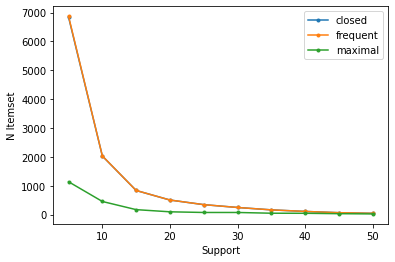

In [ ]:
labels= ['closed', 'frequent', 'maximal']
len_itemsets = {'c': [], 'a': [], 'm': []}
idx=-1
for key in len_itemsets:
  idx+=1
  for sup in dict_char[key]:
    len_itemsets[key].append(len(dict_char[key][sup]))
  plt.plot(range(5, 50+1, 5), len_itemsets[key], marker='.', label=labels[idx])
plt.xlabel("Support")
plt.ylabel("N Itemset")
plt.legend()
plt.show()

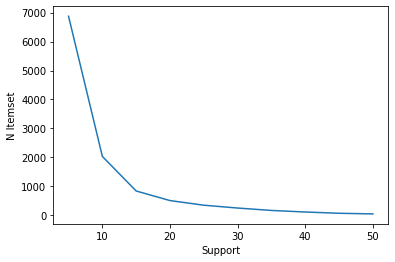

In [ ]:
len_itemsets = []
for sup_val in range(5, 50+1, 5):
  itemsets_freq = apriori(baskets, target='a', supp=sup_val, zmin=2)
  len_itemsets.append(len(itemsets_freq))

plt.plot(range(5, 50+1, 5),len_itemsets) #all'aumentare del supporto diminuiscono gli itemset frequenti che si ottengono
plt.xlabel("Support")
plt.ylabel("N Itemset")

plt.show()

# Association rules extraction with different values of confidence

In [ ]:
conf_value=np.arange(30,81,5)

In [ ]:
#all_rules=[]
for value in conf_value:
  itemrules=apriori(baskets, target='r', supp=20, conf=value, zmin=2, report='ascl')
  #all_rules.append(itemrules)
  #itemsrulesSorted= sorted(itemrules,reverse=True,key=takeSecond)
  #print(value, itemrules)


50 [('No relevent experience', ('Full time course',), 2345, 0.12240317360893621, 0.6111545478238207, 2.181978909282288), ('(0, 5] exp', ('Full time course',), 2250, 0.11744440964610084, 0.5863956215793589, 1.7594623834326324), ('Graduate', ('Full time course',), 2299, 0.12000208790061594, 0.599166015115976, 0.9659869155593594), ('High cdi', ('Full time course',), 2134, 0.11138949785990186, 0.5561636695334897, 0.7954448362017615), ('(0.665, 84.75] thours', ('Full time course',), 2839, 0.14818874621568012, 0.7399009642950222, 1.0071064066759527), (0.0, ('Full time course',), 2382, 0.1243344816786721, 0.6207974980453479, 0.8270105324770722), ('Pvt Ltd', ('Full time course',), 2733, 0.14265580958346383, 0.7122752150117279, 0.9463084999441528), ('STEM', ('Full time course',), 2749, 0.1434909698298361, 0.7164451394318478, 0.9226091269231257), ('Male', ('Full time course',), 3451, 0.18013362563941956, 0.8994005733646078, 0.9966288498189112), ('Graduate', ('(84.75, 168.5] thours',), 2431, 0.12

# Discussion of the most interesting rules and analyze how changes the number of rules w.r.t. the min_conf parameter, histogram of rules' confidence and lift

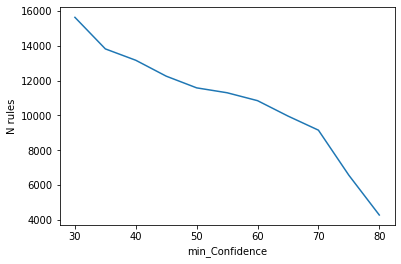

In [ ]:
len_rulesets=[]
for conf_val in conf_value:
  rulesets_freq = apriori(baskets, target='r', supp=10, conf=conf_val, zmin=2, report='ascl')
  len_rulesets.append(len(rulesets_freq))

plt.plot(conf_value, len_rulesets)
plt.xlabel("min_Confidence")
plt.ylabel("N rules")

plt.show()

In [ ]:
itemrules=apriori(baskets, target='r', supp=10, conf=50, zmin=2, report='ascl')

In [ ]:
df_rules=pd.DataFrame(itemrules, columns =['conseguente', 'antecedente', 'supp_ass', 'supp_rel', 'conf', 'lift'])

In [ ]:
with option_context('display.max_colwidth', 400):
  display(df_rules.sort_values(by='lift', ascending=False).head(10))

,conseguente,antecedente,supp_ass,supp_rel,conf,lift
17,High School,"(No Discipline,)",2072,0.108153,0.869128,8.036074
16,No Discipline,"(High School,)",2072,0.108153,1.000000,8.036074
14,No Discipline,"(High School, Male)",1921,0.100271,1.000000,8.036074
15,High School,"(No Discipline, Male)",1921,0.100271,0.867269,8.018886
10,High School,"(No Discipline, 0.0)",1667,0.087013,0.860609,7.957312
386,>20 exp,"(>4 lnewj, High cdi, Has relevent experience, no_enrollment, Male)",1078,0.056269,0.535519,3.061616
398,>20 exp,"(>4 lnewj, High cdi, no_enrollment, STEM)",1098,0.057313,0.534827,3.057660
387,>20 exp,"(>4 lnewj, High cdi, Has relevent experience, no_enrollment)",1152,0.060132,0.532594,3.044891
399,>20 exp,"(>4 lnewj, High cdi, no_enrollment, Male)",1243,0.064882,0.529612,3.027846
394,>20 exp,"(>4 lnewj, High cdi, no_enrollment, 0.0, Male)",1068,0.055747,0.526887,3.012265


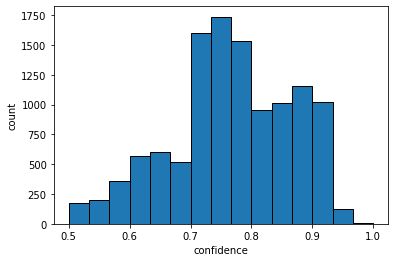

In [ ]:
df_rules['conf'].plot(kind='hist',edgecolor='black', bins=15)
plt.xlabel('confidence')
plt.ylabel('count')
plt.show()

**Istogrammi della Lift**

Distribuzione del valore di Lift per confidenza=60

In [ ]:
itemrules_60=apriori(baskets, target='r', supp=10, conf=60, zmin=2, report='ascl')

In [ ]:
df_rules=pd.DataFrame(itemrules_60, columns =['conseguente', 'antecedente', 'supp_ass', 'supp_rel', 'conf', 'lift'])

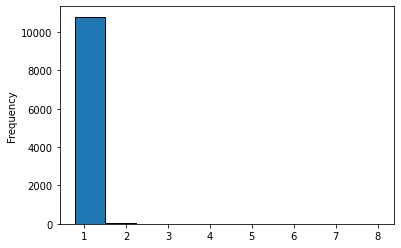

In [ ]:
conf60=df_rules['lift']
df_rules['lift'].plot(kind='hist',edgecolor='black')
plt.show()

Distribuzione del valore di Lift per confidenza=40




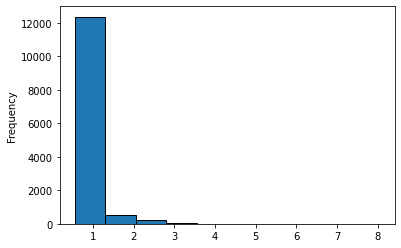

In [ ]:
itemrules_40=apriori(baskets, target='r', supp=10, conf=40, zmin=2, report='ascl')
df_rules=pd.DataFrame(itemrules_40, columns =['conseguente', 'antecedente', 'supp_ass', 'supp_rel', 'conf', 'lift'])
conf40=df_rules['lift']
df_rules['lift'].plot(kind='hist',edgecolor='black')
plt.show()

Distribuzione del valore di Lift per confidenza=50

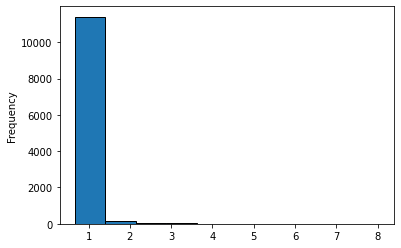

In [ ]:
itemrules_50=apriori(baskets, target='r', supp=10, conf=50, zmin=2, report='ascl')
df_rules=pd.DataFrame(itemrules_50, columns =['conseguente', 'antecedente', 'supp_ass', 'supp_rel', 'conf', 'lift'])
conf50= df_rules['lift']
df_rules['lift'].plot(kind='hist',edgecolor='black')
plt.show()

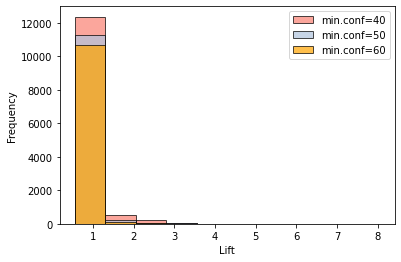

In [ ]:
df4 = pd.DataFrame(
    {
        "min.conf=40": conf40,
        "min.conf=50": conf50,
        "min.conf=60": conf60,
    },

   )

df4.plot.hist(alpha=0.7, edgecolor='black', color=["salmon","lightsteelblue", "orange"])

plt.xlabel("Lift")

plt.show()

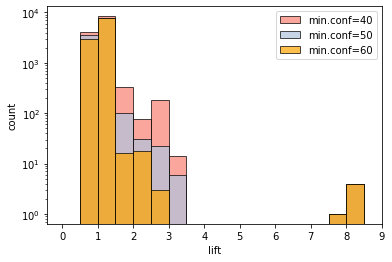

In [ ]:
col=["salmon","lightsteelblue", "orange"]
labels=df4.columns
count=-1
for val in labels:
  count+=1
  plt.hist(df4[val], label=val, edgecolor='black', alpha=0.7, bins=np.arange(0,9,0.5), color=col[count])

plt.yscale("log")
plt.xticks(np.arange(0,10))

plt.xlabel('lift')
plt.ylabel('count')

plt.legend(fontsize=10, loc='best')

plt.show()

**Istogrammi della Confidence**

In [ ]:
itemrules_40=apriori(baskets, target='r', supp=10, conf=40, zmin=2, report='ascl')
df_rules=pd.DataFrame(itemrules_40, columns =['conseguente', 'antecedente', 'supp_ass', 'supp_rel', 'conf', 'lift'])
confi40= df_rules['conf']


In [ ]:
itemrules_50=apriori(baskets, target='r', supp=10, conf=50, zmin=2, report='ascl')
df_rules=pd.DataFrame(itemrules_50, columns =['conseguente', 'antecedente', 'supp_ass', 'supp_rel', 'conf', 'lift'])
confi50= df_rules['conf']

In [ ]:
itemrules_60=apriori(baskets, target='r', supp=10, conf=60, zmin=2, report='ascl')
df_rules=pd.DataFrame(itemrules_60, columns =['conseguente', 'antecedente', 'supp_ass', 'supp_rel', 'conf', 'lift'])
confi60= df_rules['conf']

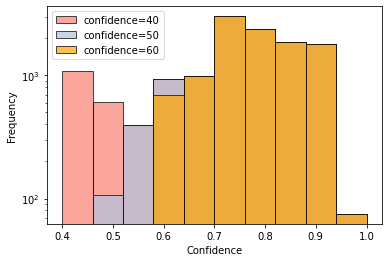

In [ ]:
df5 = pd.DataFrame(
    {
        "confidence=40": confi40,
        "confidence=50": confi50,
        "confidence=60": confi60,
    },

   )

df5.plot.hist(alpha=0.7, edgecolor='black', color=["salmon","lightsteelblue", "orange"])
plt.yscale("log")
plt.xlabel("Confidence")

plt.show()

In [ ]:
df5.head()

,confidence=40,confidence=50,confidence=60
0,0.421655,0.605414,0.605414
1,0.424228,0.611486,0.611486
2,0.605414,0.568974,0.715773
3,0.611486,0.576737,0.714286
4,0.568974,0.715773,0.721499


In [ ]:
col=["salmon","lightsteelblue", "orange"]
labels=df5.columns
count=-1
for val in labels:
  count+=1
  plt.hist(df5[val], label=val, edgecolor='black', alpha=0.7, bins=np.arange(0,9,0.5), color=col[count])

plt.yscale("log")

plt.xticks(np.arange(0,5,0.5)

plt.xlabel("confidence")

plt.ylabel('frequency')

plt.legend(fontsize=10, loc='best')

plt.show()

SyntaxError: ignored

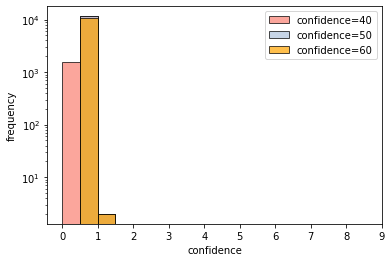

In [ ]:

col=["salmon","lightsteelblue", "orange"]
labels=df5.columns
count=-1
for val in labels:
  count+=1
  plt.hist(df5[val], label=val, edgecolor='black', alpha=0.7, bins=np.arange(0,9,0.5), color=col[count])

plt.yscale("log")
plt.xticks(np.arange(0,10))

plt.xlabel('confidence')

plt.ylabel('frequency')

plt.legend(fontsize=10, loc='best')

plt.show()

# Task 5:Use the most meaningful rules to replace missing values and evaluate the accuracy (da domandare al Prof.)

# Task 6: Use the most meaningful rules to predict the target variable and evaluate the accuracy (da chiarire)

In [ ]:
itemrules=apriori(baskets, target='r', supp=10, conf=50, zmin=2, report='ascl')

In [ ]:
df_rules=pd.DataFrame(itemrules, columns =['conseguente', 'antecedente', 'supp_ass', 'supp_rel', 'conf', 'lift'])

In [ ]:
df_rules[df_rules['conseguente']==1].sort_values(by='lift', ascending=False).head(10)

,conseguente,antecedente,supp_ass,supp_rel,conf,lift
3723,1,"(Medium cdi, (0, 5] exp, STEM)",1020,0.053241,0.532359,2.135008
3729,1,"(Medium cdi, (0, 5] exp)",1233,0.064360,0.502855,2.016683
3726,1,"(Medium cdi, (0, 5] exp, Male)",1106,0.057730,0.500000,2.005233


In [ ]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(df_rules[df_rules['conseguente']==0].sort_values(by='lift', ascending=False).head(40))

,conseguente,antecedente,supp_ass,supp_rel,conf,lift
2453,0,"(Masters, High cdi, Has relevent experience, no_enrollment, STEM, Male)",1820,0.094999,0.907278,1.208653
2510,0,"(Masters, High cdi, Has relevent experience, STEM, Male)",1976,0.103142,0.904762,1.205301
2458,0,"(Masters, High cdi, Has relevent experience, no_enrollment, STEM)",1988,0.103769,0.904047,1.204349
2463,0,"(Masters, High cdi, Has relevent experience, no_enrollment, Male)",2006,0.104708,0.904011,1.204300
2518,0,"(Masters, High cdi, Has relevent experience, Male)",2180,0.113791,0.901945,1.201547
8464,0,"(1 lnewj, High cdi, Has relevent experience, no_enrollment, Pvt Ltd, STEM)",1875,0.097870,0.901876,1.201456
2514,0,"(Masters, High cdi, Has relevent experience, STEM)",2161,0.112799,0.900792,1.200012
2467,0,"(Masters, High cdi, Has relevent experience, no_enrollment)",2222,0.115983,0.900689,1.199875
8336,0,"(1 lnewj, High cdi, Has relevent experience, (0.665, 84.75] thours, no_enrollment, STEM)",1861,0.097140,0.900339,1.199408
8481,0,"(1 lnewj, High cdi, Has relevent experience, no_enrollment, STEM, Male)",2266,0.118280,0.899921,1.198851


In [ ]:
with option_context('display.max_colwidth', 400):
  display(df_rules[df_rules['conseguente'].isin([0,1])].sort_values(by='lift', ascending=False).head(20))

,conseguente,antecedente,supp_ass,supp_rel,conf,lift
3723,1,"(Medium cdi, (0, 5] exp, STEM)",1020,0.053241,0.532359,2.135008
3729,1,"(Medium cdi, (0, 5] exp)",1233,0.064360,0.502855,2.016683
3726,1,"(Medium cdi, (0, 5] exp, Male)",1106,0.057730,0.500000,2.005233
2453,0,"(Masters, High cdi, Has relevent experience, no_enrollment, STEM, Male)",1820,0.094999,0.907278,1.208653
2510,0,"(Masters, High cdi, Has relevent experience, STEM, Male)",1976,0.103142,0.904762,1.205301
2458,0,"(Masters, High cdi, Has relevent experience, no_enrollment, STEM)",1988,0.103769,0.904047,1.204349
2463,0,"(Masters, High cdi, Has relevent experience, no_enrollment, Male)",2006,0.104708,0.904011,1.204300
2518,0,"(Masters, High cdi, Has relevent experience, Male)",2180,0.113791,0.901945,1.201547
8464,0,"(1 lnewj, High cdi, Has relevent experience, no_enrollment, Pvt Ltd, STEM)",1875,0.097870,0.901876,1.201456
2514,0,"(Masters, High cdi, Has relevent experience, STEM)",2161,0.112799,0.900792,1.200012


In [ ]:
df0 = df_rules[df_rules['conseguente'].isin([0,1])].sort_values(by='lift', ascending=False)
df0.head()

,conseguente,antecedente,supp_ass,supp_rel,conf,lift
3723,1,"(Medium cdi, (0, 5] exp, STEM)",1020,0.053241,0.532359,2.135008
3729,1,"(Medium cdi, (0, 5] exp)",1233,0.064360,0.502855,2.016683
3726,1,"(Medium cdi, (0, 5] exp, Male)",1106,0.057730,0.500000,2.005233
2453,0,"(Masters, High cdi, Has relevent experience, n...",1820,0.094999,0.907278,1.208653
2510,0,"(Masters, High cdi, Has relevent experience, S...",1976,0.103142,0.904762,1.205301


In [ ]:
df0['antecedente'].values

array([('Medium cdi', '(0, 5] exp', 'STEM'), ('Medium cdi', '(0, 5] exp'),
       ('Medium cdi', '(0, 5] exp', 'Male'), ...,
       ('Medium cdi', 'Graduate', '(0.665, 84.75] thours', 'STEM'),
       ('Medium cdi', '1 lnewj', 'STEM'),
       ('Medium cdi', '(0, 5] exp', 'Male')], dtype=object)

In [ ]:
set((df0.values[0,1]))

{'(0, 5] exp', 'Medium cdi', 'STEM'}

In [ ]:
df_pm[(df_pm['city_development_index'] == 'Medium cdi') & (df_pm['experience'] == '(0, 5] exp') & (df_pm['major_discipline'] == 'STEM')]

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,Medium cdi,Male,No relevent experience,Full time course,Graduate,STEM,"(0, 5] exp",50-99 com_size,Pvt Ltd,0 lnewj,"(0.665, 84.75] thours",0.0
17,Medium cdi,Male,Has relevent experience,no_enrollment,Graduate,STEM,"(0, 5] exp",5000-9999 com_size,Pvt Ltd,"[2, 4] lnewj","(0.665, 84.75] thours",0.0
24,Medium cdi,Male,Has relevent experience,no_enrollment,Graduate,STEM,"(0, 5] exp",1000-4999 com_size,Pvt Ltd,1 lnewj,"(0.665, 84.75] thours",0.0
45,Medium cdi,Female,No relevent experience,Full time course,Masters,STEM,"(0, 5] exp",100-500 com_size,Public Sector,0 lnewj,"(0.665, 84.75] thours",1.0
46,Medium cdi,Male,Has relevent experience,no_enrollment,Graduate,STEM,"(0, 5] exp",100-500 com_size,Pvt Ltd,0 lnewj,"(84.75, 168.5] thours",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19144,Medium cdi,Male,No relevent experience,Full time course,Graduate,STEM,"(0, 5] exp",50-99 com_size,Pvt Ltd,0 lnewj,"(0.665, 84.75] thours",1.0
19145,Medium cdi,Female,No relevent experience,Full time course,Graduate,STEM,"(0, 5] exp",1000-4999 com_size,Pvt Ltd,0 lnewj,"(168.5, 252.25] thours",0.0
19147,Medium cdi,Male,No relevent experience,Full time course,Graduate,STEM,"(0, 5] exp",100-500 com_size,Pvt Ltd,1 lnewj,"(0.665, 84.75] thours",1.0
19148,Medium cdi,Male,Has relevent experience,no_enrollment,Masters,STEM,"(0, 5] exp",100-500 com_size,Pvt Ltd,"[2, 4] lnewj","(0.665, 84.75] thours",1.0


In [ ]:
df_pm.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,High cdi,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20 exp,50-99 com_size,Pvt Ltd,1 lnewj,"(0.665, 84.75] thours",1.0
1,Medium cdi,Male,No relevent experience,no_enrollment,Graduate,STEM,"(10, 15] exp",50-99 com_size,Pvt Ltd,>4 lnewj,"(0.665, 84.75] thours",0.0
2,Medium cdi,Male,No relevent experience,Full time course,Graduate,STEM,"(0, 5] exp",50-99 com_size,Pvt Ltd,0 lnewj,"(0.665, 84.75] thours",0.0
3,High cdi,Male,No relevent experience,no_enrollment,Graduate,Business Degree,"(0, 5] exp",500-999 com_size,Pvt Ltd,0 lnewj,"(0.665, 84.75] thours",1.0
4,Medium cdi,Male,Has relevent experience,no_enrollment,Masters,STEM,>20 exp,50-99 com_size,Funded Startup,"[2, 4] lnewj","(0.665, 84.75] thours",0.0


In [ ]:
set((df0.values[0,1])).issubset(set(df_pm.values[45,:]))

True

In [ ]:
prediction = []
predictable = bool()
for i in range(0,len(df_pm)):
  predictable = False
  for j in range(0,20):
    if set((df0.values[j,1])).issubset(set(df_pm.values[i,:])):
      prediction.append(df0.values[j,0])
      predictable = True
      break
  if not predictable:
    prediction.append('No prediction')  
  print(i)

In [ ]:
prediction = []
#predictable = bool()
for i in range(0,46):
  predictable = 1
  print(i)
  for j in range(0,20):
    if set((df0.values[j,1])).issubset(set(df_pm.values[i,:])):
      print(set(df0.values[j,1]), set(df_pm.values[i,:]) )
      prediction.append(df0.values[j,0])
      predictable = 0
      break
  if predictable != 0:
    prediction.append('No prediction')  
  print(set((df0.values[j,1])).issubset(set(df_pm.values[i,:])), 'prediction:', prediction[i])

In [ ]:
prediction[45] == df_pred['target'].values[45]

True

In [ ]:
df_pred=df_pm.copy()
#df_pred['prediction']=prediction

In [ ]:
#df_pred['prediction'].to_csv('/content/drive/MyDrive/Colab Notebooks/HR_Analytics/pattern_mining_prediction.csv')

In [ ]:
predictions=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR_Analytics/pattern_mining_prediction.csv')
#df_pred['prediction']=prediction

In [ ]:
predictions.values[45,1]

'1.0'

In [ ]:
df_pred['prediction']=prediction['prediction']

In [ ]:
df_pred.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,prediction
0,High cdi,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20 exp,50-99 com_size,Pvt Ltd,1 lnewj,"(0.665, 84.75] thours",1.0,0.0
1,Medium cdi,Male,No relevent experience,no_enrollment,Graduate,STEM,"(10, 15] exp",50-99 com_size,Pvt Ltd,>4 lnewj,"(0.665, 84.75] thours",0.0,No prediction
2,Medium cdi,Male,No relevent experience,Full time course,Graduate,STEM,"(0, 5] exp",50-99 com_size,Pvt Ltd,0 lnewj,"(0.665, 84.75] thours",0.0,1.0
3,High cdi,Male,No relevent experience,no_enrollment,Graduate,Business Degree,"(0, 5] exp",500-999 com_size,Pvt Ltd,0 lnewj,"(0.665, 84.75] thours",1.0,No prediction
4,Medium cdi,Male,Has relevent experience,no_enrollment,Masters,STEM,>20 exp,50-99 com_size,Funded Startup,"[2, 4] lnewj","(0.665, 84.75] thours",0.0,No prediction


In [ ]:
df_pred['prediction'].values

array(['0.0', 'No prediction', '1.0', ..., 'No prediction',
       'No prediction', 'No prediction'], dtype=object)

In [ ]:
np.sum(df_pred['prediction'].values == df_pred['target'].astype(str))

5758

In [ ]:
np.sum(df_pred['prediction'].values == df_pred['target'].astype(str))/(len(df_pred['prediction'])+1)

0.3005376063468866

In [ ]:
df_pred['target'].astype(str)

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: object

In [ ]:
df_pred[['prediction', 'target']]

,prediction,target
0,0.0,1.0
1,No prediction,0.0
2,1.0,0.0
3,No prediction,1.0
4,No prediction,0.0
...,...,...
19153,No prediction,1.0
19154,No prediction,1.0
19155,No prediction,0.0
19156,No prediction,0.0


In [ ]:
df_pred['prediction'].value_counts()

No prediction    11635
0.0               5071
1.0               2452
Name: prediction, dtype: int64

In [ ]:
df_pred['prediction'].isin(df_pred['target']).value_counts()

False    11635
True      7523
Name: prediction, dtype: int64

In [ ]:
accuracy

0.39268190834116296